In [ ]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

Funciones de carga y preparación de datos

In [1]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  #quitar el print
  print(list_paths)
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    #quitar el print
    print(tweet_id)
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

In [2]:
#my_dict = get_tweet_content('profner/subtask-1/test-background-txt-files/1263117343498080257.txt')
#my_dict
os.getcwd()

'/content'

In [3]:
my_dict = get_tweet_content(['/content/profner/subtask-1/test-background-txt-files/1263117343498080257.txt'])
my_dict

['/content/profner/subtask-1/test-background-txt-files/1263117343498080257.txt']
1263117343498080257


{1263117343498080257: '@blancozurdoo @luchovpp @partidazocope No te has puesto una mascarilla en tu vida y vas diciendo que la gente que hace deporte tiene que llevarla, eres un bocachancla, desde el sofá se ve todo muy bonito y más fácil, te animo a que salgas a experimentar y a comprobar las tonterías que sueltas'}

In [4]:
get_profner_data('/content/profner/')

Se han truncado las últimas 5000 líneas del flujo de salida.
1270980536106975232
1270062784219398145
1263770107307835392
1266484941212319748
1256628297754124288
1272099140957331456
1269180687137091584
1269879143380013056
1252985364001820673
1292934554085470208
1248059271125839880
1267123537111891969
1251543391097290757
1260551428030050305
1247143919118356480
1252388313639481346
1278333808585183233
1253239820064784386
1289288269834813440
1260500072111931394
1268800326859141120
1283461403161038848
1251502949794283522
1262143417469067267
1292124974254350337
1257189054766071811
1254115087255830531
1293265630674718726
1285317886177955841
1291488529432956933
1284899139222999043
1270806995763855360
1253596865683226624
1266698326180802561
1250167617677135873
1260096118865747975
1284831230517809153
1289205771423510528
1276729246141079554
1282934771656601600
1279734676102545408
1253258073839452160
1260811864180764674
1262432090232172547
1260329766302990336
1266378455857283074
1288206860995235841

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train
...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid


# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob). 
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [5]:
!python -m spacy download es_core_news_sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import es_core_news_sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

2022-11-10 22:15:09.483183: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 6.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [6]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

Se han truncado las últimas 5000 líneas del flujo de salida.
1270980536106975232
1270062784219398145
1263770107307835392
1266484941212319748
1256628297754124288
1272099140957331456
1269180687137091584
1269879143380013056
1252985364001820673
1292934554085470208
1248059271125839880
1267123537111891969
1251543391097290757
1260551428030050305
1247143919118356480
1252388313639481346
1278333808585183233
1253239820064784386
1289288269834813440
1260500072111931394
1268800326859141120
1283461403161038848
1251502949794283522
1262143417469067267
1292124974254350337
1257189054766071811
1254115087255830531
1293265630674718726
1285317886177955841
1291488529432956933
1284899139222999043
1270806995763855360
1253596865683226624
1266698326180802561
1250167617677135873
1260096118865747975
1284831230517809153
1289205771423510528
1276729246141079554
1282934771656601600
1279734676102545408
1253258073839452160
1260811864180764674
1262432090232172547
1260329766302990336
1266378455857283074
1288206860995235841

In [7]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

En este apartado se realiza un análisis de los datos previo a la normalización de los mismos para extraer información relevante del dataset.

* **Número de documentos y columnas:**

Comenzamos mostrando el número de documentos del data frame:

In [8]:
print("Tenemos un conjunto de {} documentos".format(len(datos_ejercicio)))
print("El dataframe tiene {} columnas".format(datos_ejercicio.shape[1]))

Tenemos un conjunto de 8000 documentos
El dataframe tiene 4 columnas


* **Número de documentos duplicados:**

Comprobamos y eliminamos las filas con algún valor vacío (NA) y quitaremos los duplicados. En este caso, no hay duplicados que eliminar.

In [9]:
print("Existen {} tweets duplicados".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))
# Quitaremos esos duplicados
#datos_ejercicio = datos_ejercicio.drop_duplicates()
#print("Despues de quitar duplicados tenemos un conjunto de {} tweets".format(datos_ejercicio.shape[0]))

Existen 0 tweets duplicados


Comprobaramos que no hayan quedado Nulls en ningunas de las dos columnas del dataset.

In [10]:
print("Hay {} valores vacíos en los tweets y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[1],
                                                                                                       np.sum(datos_ejercicio.isnull())[2]))

Hay 0 valores vacíos en los tweets y 0 valores vacíos en las etiquetas en los datos


* **Quitamos columnas no necesarias:**

Eliminamos la columna "set" del dataframe porque no aporta información relevante.

In [11]:
datos_ejercicio = datos_ejercicio.drop(['set'], axis=1)
datos_ejercicio.columns

Index(['tweet_id', 'tweet_text', 'label'], dtype='object')

* **Número de documentos por cada clase:**

Contamos el número de elementos de cada clase que están presentes en la columna "label". En este caso nos encontramos dos tipos de documentos (tweets):

- "Label = 1": Tweets contienen referencia a una profesión
- "Label = 0": Tweets no contienen referencia a una profesión 

Comprobemos la distribución de las clases.

In [12]:
datos_ejercicio["label"].value_counts()

0    6130
1    1870
Name: label, dtype: int64

El dataset no está balanceado. Posteriormente, en la sección de los modelos, balancearemos para obtener resultados más acordes.


* **Distribución de la longitud de los tweets en caracteres:**

Obtenemos la longitud de cada uno de los textos de los documentos para despues dibujar su histograma. 

In [13]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x)) #tweet_text
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,char_len
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,87
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,90
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,95
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,225


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


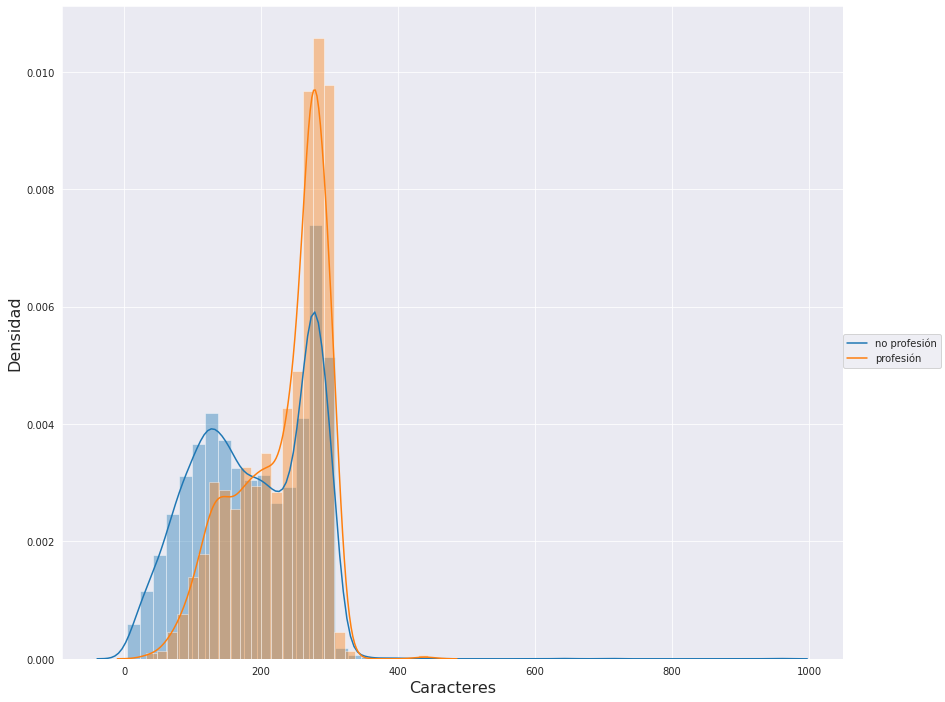

In [14]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].char_len, hist=True, label="no_profesion")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==1].char_len, hist=True, label="profesion")
fig.legend(labels=['no profesión','profesión'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

En la figura se ve que no existen diferencias significativas entre las dos clases. Por ello, no somos capaces de diferenciar los tweets por clases en base a la longitud. Necesitamos de algún mecanismo de IA para ello.

## 3. Preprocesado y Normalización
Como hemos visto, está dividido en dos pasos Normalización o Preprocesado y Transformación

## Normalización
Vamos a proceder a normalizar los datos. Para ello vamos a generar pequeñas funciones que nos permitan:
- Eliminar saltos de línea y espacios extra.
- Eliminar urls
- Transformar a minúsculas.
- Tokenizar.
- Eliminar stopwords.
- Eliminar sígnos de puntuación.
- Lematizar tokens.

* **Eliminar saltos de línea:**

Eliminamos los saltos de línea.

In [15]:
# Eliminar saltos de línea
def eliminar_salto_linea(text): 
    return  re.sub('\n','',text) 

In [16]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text"].apply(lambda x: eliminar_salto_linea(x))

* **Eliminar espacios extra:**

Eliminamos espacios extra.

In [17]:
# Eliminar espacios extra
def eliminar_espacios(text): 
    return  " ".join(text.split()) 

In [18]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: eliminar_espacios(x))

* **Quitamos las urls:**

Eliminamos las urls del texto. En este caso, procedemos a eliminar las urls que aparecen el contenido de los tweets porque no se considera que aporten información.

In [19]:
# Eliminar url
def eliminar_url(text): 
    return  re.sub('http[s]*\S+','',text)

In [20]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: eliminar_url(x))

* **Transformar a minúsculas:**

Pasamos el texto a minúsculas.

In [21]:
# Pasar a minúsculas
def texto_to_lower(text):
  return text.lower()

In [22]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: texto_to_lower(x))

* **Tokenizar:**

Obtenemos los tokens.

In [23]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
def tokenize(texto):
    tweet_tokenizer = TweetTokenizer()
    tokens_list = tweet_tokenizer.tokenize(texto)
    return tokens_list

In [24]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: tokenize(x))

* **Eliminar stopwords:**

Eliminamos stopwords.

In [25]:
# Quitar stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: quitar_stopwords(x))

* **Eliminar signos de puntuación:**

Eliminamos la signos de puntuación.

In [27]:
# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    #words=[word for word in tokens if (word.isalnum() or word.startswith("@") or word.startswith("#"))]
    words=[word for word in tokens if word.isalnum()]
    return words

In [28]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: quitar_puntuacion(x))

* **Lematizaremos:**

Lematizaremos.

In [29]:
# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = es_core_news_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [30]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: lematizar(x))

Mostramos un gráfico de nube de palabras, una vez tenemos el contenido de los tweets tratado.

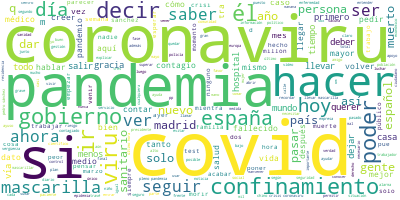

In [31]:
from wordcloud import WordCloud

long_string=str(','.join(list(datos_ejercicio['tweet_text_processed'].values)))
                          
wordcloud = WordCloud(background_color="white",max_words=5000,contour_width=0,contour_color="steelblue")

# Generate a word cloud image
wordcloud.generate(long_string)

wordcloud.to_image()

* **Extracción de sentimiento:**

Una vez lematizados, extraemos sentimiento del texto. Al no ser en inglés el contenido de los tweets, no podemos hacer uso de la librería TextBlob.

In [32]:
url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

dicc_mapping = {"Alegría":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsión":"negative"}
                
sel_lexicon["Categoría"] = sel_lexicon["Categoría"].map(dicc_mapping)

positive_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="negative"][' PFA']))

def calculate_sentiment(frase, positive_words, negative_words):
  """
  Función para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en español. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extraídas de SEL

  Out:
    Sentiment score  
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0
  
  return score

In [33]:
datos_ejercicio["tweet_text_sentiment"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: calculate_sentiment(x, positive_words, negative_words))

In [34]:
datos_ejercicio["tweet_text_sentiment"]

0       0.000
1       0.630
2       0.000
3       0.000
4       0.397
        ...  
7995   -0.729
7996    0.000
7997   -0.729
7998   -0.696
7999    0.000
Name: tweet_text_sentiment, Length: 8000, dtype: float64

In [35]:
#datos_ejercicio["tweet_text"].to_csv("tweets.csv", sep='\t', encoding='utf-8')
datos_ejercicio.columns

Index(['tweet_id', 'tweet_text', 'label', 'char_len', 'tweet_text_processed',
       'tweet_text_sentiment'],
      dtype='object')

* **Distribución de la longitud de los tweets finales en caracteres:**

Obtenemos la longitud de cada uno de los textos tras haber pasado los procesamientos anteriores para después dibujar su histograma. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


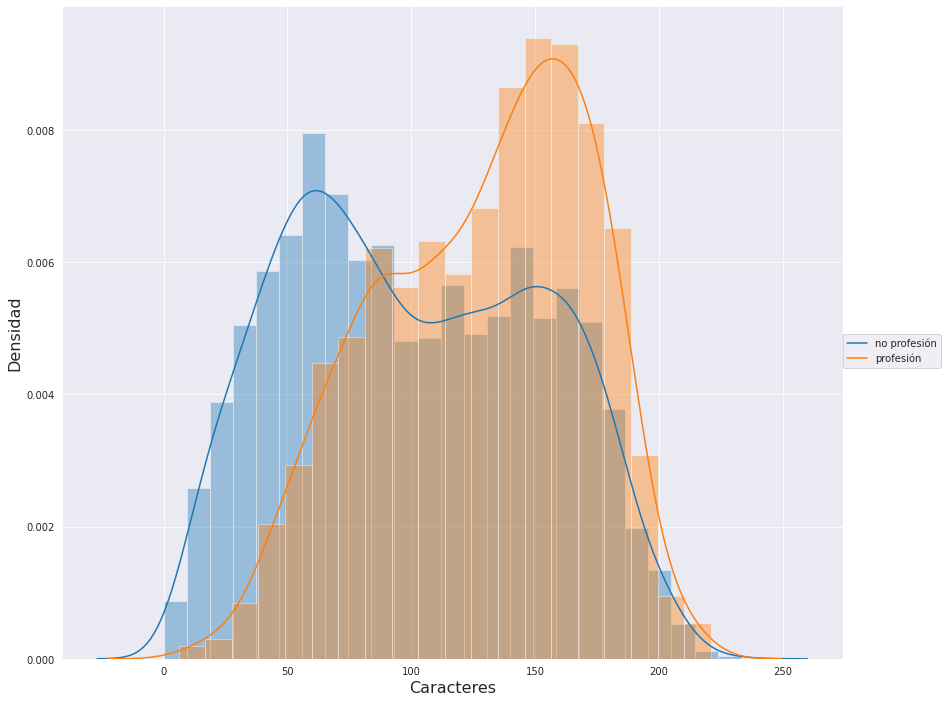

In [36]:
datos_ejercicio["token_len"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].token_len, hist=True, label="no_profesion")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==1].token_len, hist=True, label="profesion")
fig.legend(labels=['no profesión','profesión'],loc=5)

# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

Vemos que el gráfico sigue sin permitirnos diferenciar en función del número de caracteres. Sin embargo, se puede apreciar que se ha reducido el rango del número de caracteres.

## 4. Vectorización

Con los textos ya tratados, nos disponemos a vectorizar usando TfidfVectorizer.

Queremos que la funcionalidad 'TfidfVectorizer' tenga en cuenta los siguientes aspectos:
- Considerar unigramas, bigramas y trigramas
- Que el sistema no considere los elementos que salgan en menos del 1% de los documentos.
- No considerar procesados ya hechos (lowercase y stopwords) 

In [37]:
# BoW Features
vectorizador = TfidfVectorizer(min_df=0.01,ngram_range=(1,3),lowercase=False,stop_words=None)
vector_data = vectorizador.fit_transform(datos_ejercicio["tweet_text_processed"])

In [38]:
vector_data

<8000x197 sparse matrix of type '<class 'numpy.float64'>'
	with 41872 stored elements in Compressed Sparse Row format>

## 5. Entrenamiento y evaluación de modelos


Antes de empezar, debemos seleccionar el conjunto de variables que queremos considerar en el entrenamiento. 

In [39]:
extra_features = datos_ejercicio[['tweet_text_sentiment']]

In [40]:
extra_features

,tweet_text_sentiment
0,0.000
1,0.630
2,0.000
3,0.000
4,0.397
...,...
7995,-0.729
7996,0.000
7997,-0.729
7998,-0.696


Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). 

Especificaremos cual es la variable con las clases de cada documento.

In [41]:
import scipy as sp

# Definimos la variable de categorías:
y = datos_ejercicio["label"].values.astype(np.float32) 

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

También vamos a extraer el nombre de las caracteríticas por si quisieramos utilizarlos con posterioridad.

In [42]:
X_columns=vectorizador.get_feature_names()+extra_features.columns.tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
X_columns

['19',
 '2020',
 'acabar',
 'ahora',
 'alarma',
 'alguien',
 'amigo',
 'aquí',
 'así',
 'ayer',
 'ayuda',
 'ayudar',
 'ayuso',
 'año',
 'bien',
 'buen',
 'cada',
 'calle',
 'casa',
 'caso',
 'centro',
 'chino',
 'comunidad',
 'confinamiento',
 'contagiado',
 'contagio',
 'contar',
 'coronaviru',
 'coronavirus',
 'cosa',
 'covid',
 'covid 19',
 'creer',
 'crisis',
 'cómo',
 'dar',
 'dato',
 'deber',
 'decir',
 'dejar',
 'derecho',
 'después',
 'distancia',
 'dos',
 'día',
 'económico',
 'empezar',
 'empresa',
 'epidemia',
 'españa',
 'español',
 'esperar',
 'evitar',
 'explicar',
 'fallecido',
 'familia',
 'fase',
 'frente',
 'gente',
 'gestión',
 'gobierno',
 'gracia',
 'gracias',
 'gran',
 'haber',
 'hablar',
 'hacer',
 'hecho',
 'hilo',
 'hora',
 'hospital',
 'hoy',
 'iglesia',
 'igual',
 'información',
 'ir',
 'junto',
 'llamar',
 'llegar',
 'llevar',
 'luchar',
 'madrid',
 'mano',
 'mantener',
 'marzo',
 'mascarilla',
 'mascarillar',
 'mayor',
 'mañana',
 'medida',
 'medio',
 'mejo

In [44]:
print(y.shape)

(8000,)


Tenemos 198 características para 8k documentos.

Dividimos el dataset en Train/Test:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)
print(X_train.shape)
print(X_test.shape)

(6000, 198)
(2000, 198)


* **Decision de modelo de ML a utilizar**

Se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados. 

La función hace un KFold y evalua diferentes modelos con una métrica de evaluación.

In [46]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore') 
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)
          
          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)
          
          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación. En este caso hemos incorporado la regresión logística, una naive bayes, un random forest y KNeighbors.

In [47]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)), 
         ("GaussianNB",GaussianNB()),
         ("RandomForestClassifier",RandomForestClassifier(random_state=0)),
         ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=3))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X.toarray(), y)   

Metric: accuracy , KFold 
Logistic: 0.817625 (0.008052) 
Metric: accuracy , KFold 
GaussianNB: 0.720250 (0.012104) 
Metric: accuracy , KFold 
RandomForestClassifier: 0.812500 (0.006755) 
Metric: accuracy , KFold 
KNeighborsClassifier: 0.755750 (0.018099) 


([array([0.81   , 0.825  , 0.8175 , 0.8325 , 0.825  , 0.815  , 0.82125,
         0.80875, 0.805  , 0.81625]),
  array([0.7425 , 0.73125, 0.71875, 0.735  , 0.71625, 0.71125, 0.705  ,
         0.71125, 0.70625, 0.725  ]),
  array([0.81   , 0.80375, 0.81375, 0.82625, 0.82125, 0.8125 , 0.81625,
         0.80625, 0.80625, 0.80875]),
  array([0.75875, 0.79125, 0.73875, 0.76375, 0.77375, 0.74125, 0.7675 ,
         0.72875, 0.74   , 0.75375])],
 ['Logistic', 'GaussianNB', 'RandomForestClassifier', 'KNeighborsClassifier'])

Observamos un mejor funcionamiento con el regresor logístico, que será con el que intentaremos afinar los hiperparámetros.

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV.

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=8)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado.

In [49]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.812667 usando los parámetros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


Los resultados mejores deben ser introducidos a un modelo específico para ser entrenado.

In [50]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=100,penalty="l2",solver="newton-cg")
model.fit(X_train,y_train)

LogisticRegression(C=100, solver='newton-cg')

Predecimos el set de test.

In [51]:
y_pred = model.predict(X_test)

Creamos una matriz de confusión y un "classification report".

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1498   45]
 [ 322  135]]
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1543
         1.0       0.75      0.30      0.42       457

    accuracy                           0.82      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.81      0.82      0.78      2000



Por los resultados, vemos que el modelo funciona de manera óptima.

Pero los datos no estaban balanceados, así que, vamos a balancear y probar de nuevo.

**Balancear**

Sólo debemos hacer el rebalanceo en el conjunto de datos de entrenamiento.

In [53]:
from imblearn.over_sampling import SMOTE

# Creamos el objeto
sm=SMOTE(random_state=50)

# Retransformamos
X_res,y_res = sm.fit_resample(X_train,y_train)

In [54]:
print(len(y_res[y_res==0]),len(y_res[y_res==1]))
y_res.shape

4587 4587


(9174,)

Vemos que hay el mismo número de valores para ambas clases y se han añadido registros.

Con los datos balanceados, volvemos a probar los modelos.

In [55]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)), 
         ("GaussianNB",GaussianNB()),
         ("RandomForestClassifier",RandomForestClassifier(random_state=0)),
         ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=3))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_res.toarray(), y_res)   

Metric: accuracy , KFold 
Logistic: 0.706670 (0.016816) 
Metric: accuracy , KFold 
GaussianNB: 0.712668 (0.016306) 
Metric: accuracy , KFold 
RandomForestClassifier: 0.871813 (0.010630) 
Metric: accuracy , KFold 
KNeighborsClassifier: 0.706565 (0.009921) 


([array([0.69607843, 0.71023965, 0.71350763, 0.71350763, 0.73391494,
         0.7219193 , 0.69465649, 0.6870229 , 0.71973828, 0.67611778]),
  array([0.69389978, 0.69825708, 0.7254902 , 0.71568627, 0.74263904,
         0.70338059, 0.70119956, 0.72628135, 0.72737186, 0.69247546]),
  array([0.85511983, 0.89542484, 0.86165577, 0.86492375, 0.87350055,
         0.87459106, 0.87241003, 0.88222465, 0.87131952, 0.86695747]),
  array([0.70043573, 0.708061  , 0.69063181, 0.70261438, 0.72846238,
         0.70774264, 0.70665213, 0.71646674, 0.70774264, 0.69683751])],
 ['Logistic', 'GaussianNB', 'RandomForestClassifier', 'KNeighborsClassifier'])

In [56]:
X_res.shape

(9174, 198)

Observamos un mejor funcionamiento con el RandoForest, que será con el que intentaremos afinar los hiperparámetros.

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV.

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestClassifier()

param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

cv_technique = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_technique, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado.

In [58]:
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.760302 usando los parámetros {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


Tenemos modelo! Los resultados mejores deben ser introducidos a un modelo específico para ser entrenado.

In [59]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators= 100,max_features='log2',max_depth=10,criterion='gini')

model.fit(X_res.toarray(),y_res)

RandomForestClassifier(max_depth=10, max_features='log2')

Predecimos el set de test.

In [60]:
y_pred = model.predict(X_test)

Creamos una matriz de confusión y un "classification report".

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1389  154]
 [ 272  185]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1543
         1.0       0.55      0.40      0.46       457

    accuracy                           0.79      2000
   macro avg       0.69      0.65      0.67      2000
weighted avg       0.77      0.79      0.78      2000



Mostramos esa matriz de confusión de una manera gráfica.

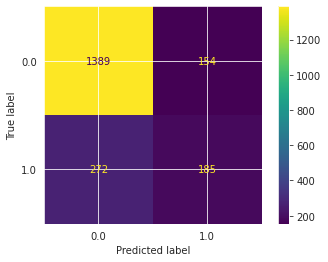

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test.toarray(), y_test, normalize = None)

El modelo funciona bastante bien para predecir los tweets de clase 0, pero no da buenos resultados para los de clase 1, que son los que indican alguna profesión. 

Se tendría que revisar el tema del balanceo porque se han creado registros auxiliares.

Hay posibilidad de mejora del modelo para que de mejores resultados.